In [ ]:
from keat_small.load_data import load_keat_small

path ="../../datahub/MRL-2021/dataset/keat"
dataset, json_data = load_keat_small(path)
dataset

DatasetDict({
    train: Dataset({
        features: ['en_text', 'ko_text', 'categories'],
        num_rows: 5034
    })
    test: Dataset({
        features: ['en_text', 'ko_text', 'categories'],
        num_rows: 4810
    })
})

In [7]:
dd = dataset.rename_columns({'en_text':'text'})
dd

DatasetDict({
    train: Dataset({
        features: ['text', 'ko_text', 'categories'],
        num_rows: 5034
    })
    test: Dataset({
        features: ['text', 'ko_text', 'categories'],
        num_rows: 4810
    })
})

| Split Name | Min | 25th Percentile | 50th Percentile (Median) | 75th Percentile | Max | Number of Samples |
|------------|-----|-----------------|--------------------------|-----------------|-----|-------------------|
| train | 32 | 101.00 | 160.00 | 200.75 | 424 | 5034 |
| test | 28 | 103.00 | 162.00 | 204.00 | 580 | 4810 |


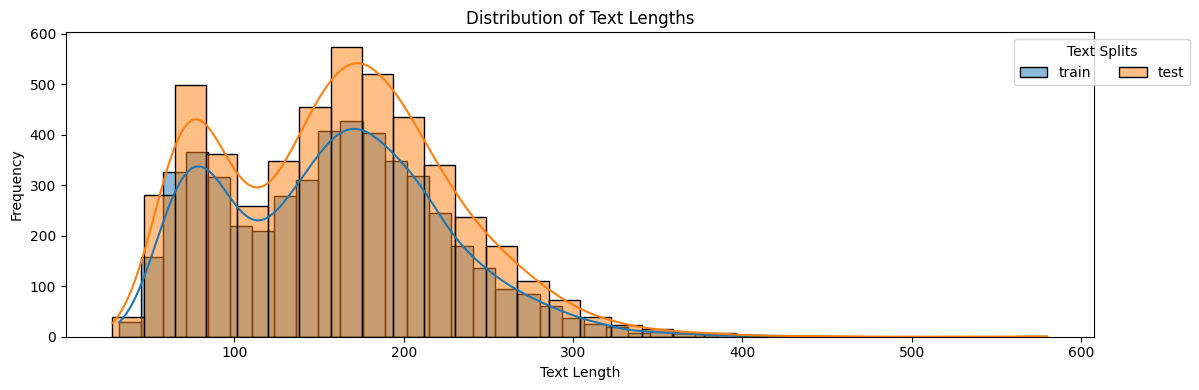

In [8]:
import os 
import matplotlib.pyplot as plt
from nlp_data.utils.visualize_text_lengths import visualize_text_lengths

os.makedirs("assets", exist_ok=True)
text_dict = {split: dd[split]['text'] for split in dd.keys()}
visualize_text_lengths(text_dict, figsize=(12, 4))
plt.savefig("assets/text_lengths.png")

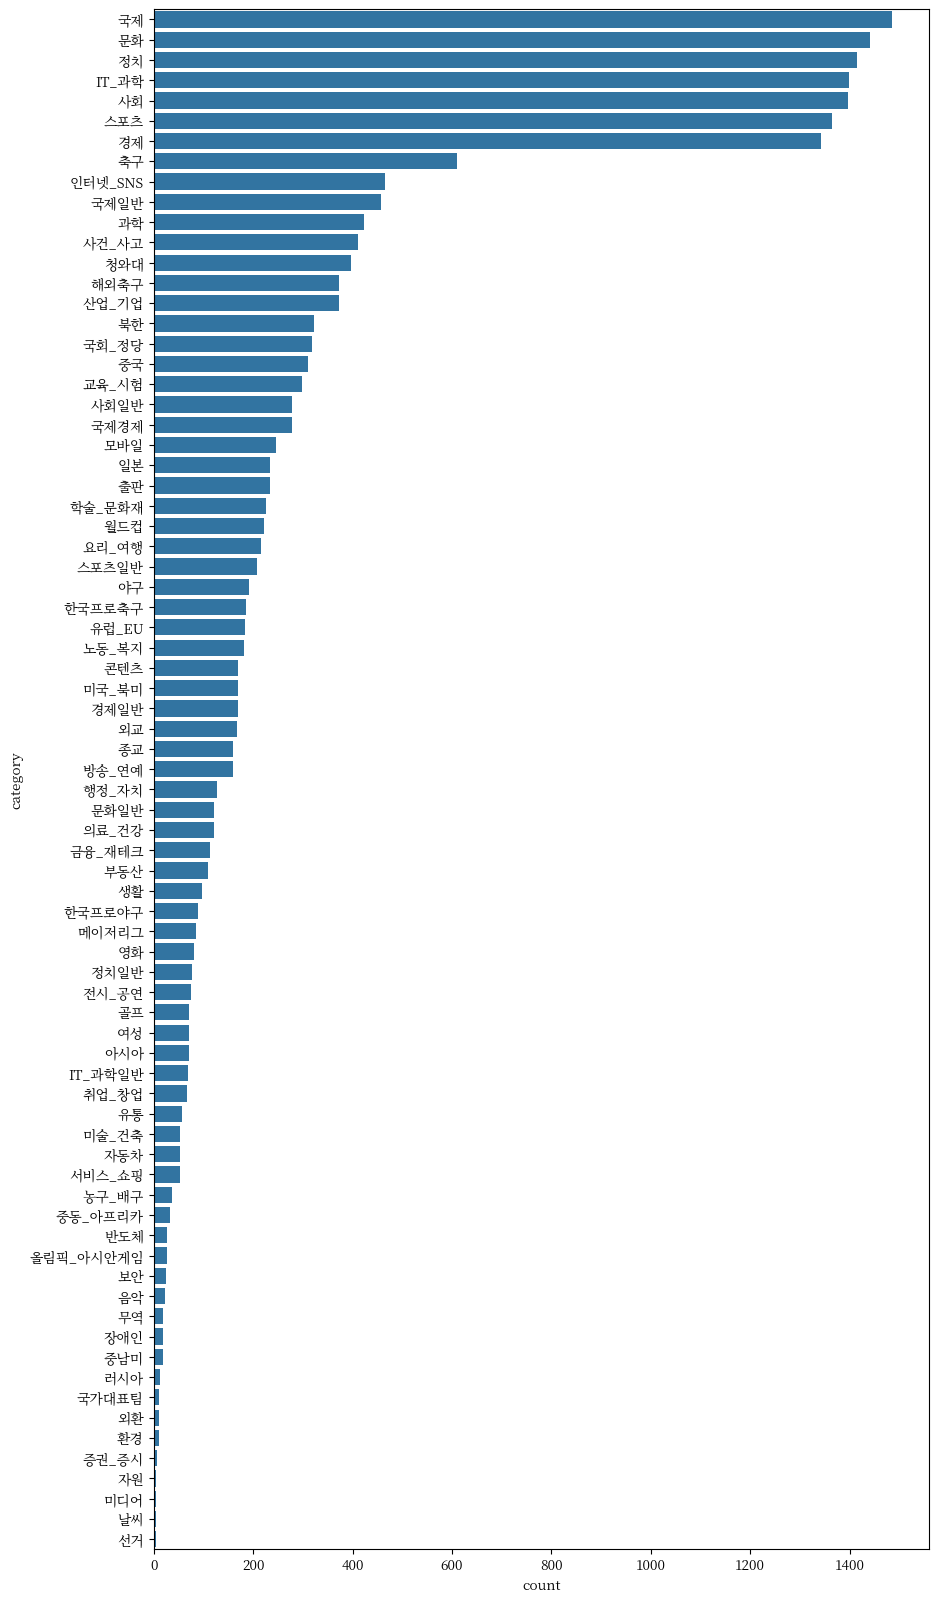

In [34]:
from matplotlib import rc
import seaborn as sns 
import pandas as pd 
# 폰트 설정
rc('font', family='Noto Serif CJK JP')

all_categories = {}
for split in dd.keys():
    for i in range(len(dataset[split])):
        for category in dataset[split][i]['categories']:
            if category not in all_categories:
                all_categories[category] = 1
            else:
                all_categories[category] += 1


df = pd.DataFrame(list(all_categories.items()), columns=['category', 'count'])
df = df.sort_values(by='count', ascending=False)
plt.figure(figsize=(10, 20))
sns.barplot(data=df, y='category', x='count')
plt.savefig("assets/category_distribution.png")

In [35]:
    

# Print statistics in simplified table format
print("| Label Name | Count |")
print("|------------|--------|")
for _, row in df.iterrows():
    print(f"| {row['category']} | {row['count']} |")

| Label Name | Count |
|------------|--------|
| 국제 | 1485 |
| 문화 | 1442 |
| 정치 | 1415 |
| IT_과학 | 1398 |
| 사회 | 1397 |
| 스포츠 | 1365 |
| 경제 | 1342 |
| 축구 | 610 |
| 인터넷_SNS | 465 |
| 국제일반 | 457 |
| 과학 | 424 |
| 사건_사고 | 410 |
| 청와대 | 397 |
| 해외축구 | 372 |
| 산업_기업 | 372 |
| 북한 | 323 |
| 국회_정당 | 318 |
| 중국 | 310 |
| 교육_시험 | 298 |
| 사회일반 | 279 |
| 국제경제 | 279 |
| 모바일 | 247 |
| 일본 | 233 |
| 출판 | 233 |
| 학술_문화재 | 225 |
| 월드컵 | 221 |
| 요리_여행 | 216 |
| 스포츠일반 | 208 |
| 야구 | 192 |
| 한국프로축구 | 186 |
| 유럽_EU | 183 |
| 노동_복지 | 181 |
| 콘텐츠 | 170 |
| 미국_북미 | 170 |
| 경제일반 | 170 |
| 외교 | 167 |
| 종교 | 160 |
| 방송_연예 | 159 |
| 행정_자치 | 127 |
| 문화일반 | 121 |
| 의료_건강 | 121 |
| 금융_재테크 | 114 |
| 부동산 | 110 |
| 생활 | 98 |
| 한국프로야구 | 89 |
| 메이저리그 | 86 |
| 영화 | 81 |
| 정치일반 | 78 |
| 전시_공연 | 74 |
| 골프 | 71 |
| 여성 | 70 |
| 아시아 | 70 |
| IT_과학일반 | 68 |
| 취업_창업 | 66 |
| 유통 | 57 |
| 미술_건축 | 53 |
| 자동차 | 53 |
| 서비스_쇼핑 | 53 |
| 농구_배구 | 36 |
| 중동_아프리카 | 32 |
| 반도체 | 27 |
| 올림픽_아시안게임 | 27 |
| 보안 | 24 |
| 음악 | 22 |
| 무역 | 19 |
| 장애

In [30]:
# import matplotlib.font_manager as fm

# # 현재 사용 가능한 폰트를 나열
# available_fonts = [f.name for f in fm.fontManager.ttflist]

# # 출력
# for font in available_fonts:
#     print(font)